<a href="https://colab.research.google.com/github/StanislavChesnokov/Dinamo-Best-Coach-Luchesku-Mihaylichenko/blob/main/Dinamo_best_coach_Luchesku_Mihaylichenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
import sklearn

In [ ]:
from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
import scipy
import statsmodels
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2021 = pd.read_excel('/content/drive/MyDrive/Datasets/dinamo-2020.xlsx', sheet_name='Лист2')

In [ ]:
df_2021.head(10)

,Тур,Дата,Команда1,Команда2,Счет
0,1-Й ТУР,21.08.20,Олимпик,Динамо,1 : 4
1,2-Й ТУР,11.09.20,Динамо,Десна,0 : 0
2,3-Й ТУР,19.09.20,Динамо,ФК Львов,3 : 1
3,4-Й ТУР,26.09.20,ФК Минай,Динамо,0 : 4
4,5-Й ТУР,04.10.20,Динамо,Заря,1 : 1
5,6-Й ТУР,17.10.20,Рух,Динамо,0 : 2
6,7-Й ТУР,24.10.20,Динамо,ФК Александрия,1 : 0
7,8-Й ТУР,31.10.20,СК Днепр-1,Динамо,1 : 2
8,9-Й ТУР,08.11.20,Динамо,Шахтер,0 : 3
9,10-Й ТУР,21.11.20,Ингулец,Динамо,0 : 2


In [ ]:
df_1920 = pd.read_excel('/content/drive/MyDrive/Datasets/dinamo-2020.xlsx', sheet_name='Лист4')
df_1920.head()

,Тур,Дата,Команда1,Команда2,Счет
0,1-Й ТУР,31.07.19,Карпаты,Динамо,0 : 2
1,2-Й ТУР,03.08.19,ФК Львов,Динамо,0 : 3
2,3-Й ТУР,10.08.19,Динамо,Шахтер,1 : 2
3,5-Й ТУР,24.08.19,Динамо,Олимпик,1 : 1
4,6-Й ТУР,01.09.19,Заря,Динамо,2 : 2


In [ ]:
df_1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Тур       32 non-null     object
 1   Дата      32 non-null     object
 2   Команда1  32 non-null     object
 3   Команда2  32 non-null     object
 4   Счет      32 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Тур       26 non-null     object
 1   Дата      26 non-null     object
 2   Команда1  26 non-null     object
 3   Команда2  26 non-null     object
 4   Счет      26 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [ ]:
df = pd.concat([df_1920,df_2021], ignore_index=True)
df.head(34)

,Тур,Дата,Команда1,Команда2,Счет
0,1-Й ТУР,31.07.19,Карпаты,Динамо,0 : 2
1,2-Й ТУР,03.08.19,ФК Львов,Динамо,0 : 3
2,3-Й ТУР,10.08.19,Динамо,Шахтер,1 : 2
3,5-Й ТУР,24.08.19,Динамо,Олимпик,1 : 1
4,6-Й ТУР,01.09.19,Заря,Динамо,2 : 2
5,7-Й ТУР,15.09.19,Динамо,Десна,1 : 2
6,8-Й ТУР,22.09.19,Ворскла,Динамо,0 : 5
7,4-Й ТУР,25.09.19,ФК Мариуполь,Динамо,0 : 1
8,9-Й ТУР,29.09.19,Динамо,СК Днепр-1,2 : 0
9,10-Й ТУР,06.10.19,Колос,Динамо,0 : 4


In [ ]:
df['Дата']=pd.to_datetime(df['Дата'], format='%d.%m.%y')
df

,Тур,Дата,Команда1,Команда2,Счет
0,1-Й ТУР,2019-07-31,Карпаты,Динамо,0 : 2
1,2-Й ТУР,2019-08-03,ФК Львов,Динамо,0 : 3
2,3-Й ТУР,2019-08-10,Динамо,Шахтер,1 : 2
3,5-Й ТУР,2019-08-24,Динамо,Олимпик,1 : 1
4,6-Й ТУР,2019-09-01,Заря,Динамо,2 : 2
5,7-Й ТУР,2019-09-15,Динамо,Десна,1 : 2
6,8-Й ТУР,2019-09-22,Ворскла,Динамо,0 : 5
7,4-Й ТУР,2019-09-25,ФК Мариуполь,Динамо,0 : 1
8,9-Й ТУР,2019-09-29,Динамо,СК Днепр-1,2 : 0
9,10-Й ТУР,2019-10-06,Колос,Динамо,0 : 4


# Feature Engineering

In [ ]:
# Добавляю тренера. 
# Хацкевич 2-06-2017 - 14-08-2019
# Михайличенко 15-08-2019 - 20-07-2020
# Луческу с 23-07-2020

df['Тренер'] = df['Дата'].apply(lambda x: 'Луческу' if x in pd.date_range(start="2020-07-23",end="2021-12-31") else ('Михайличенко' if x in pd.date_range(start="2019-08-15",end="2020-07-20") else 'Хацкевич' ))
df.head()

,Тур,Дата,Команда1,Команда2,Счет,Тренер
0,1-Й ТУР,2019-07-31,Карпаты,Динамо,0 : 2,Хацкевич
1,2-Й ТУР,2019-08-03,ФК Львов,Динамо,0 : 3,Хацкевич
2,3-Й ТУР,2019-08-10,Динамо,Шахтер,1 : 2,Хацкевич
3,5-Й ТУР,2019-08-24,Динамо,Олимпик,1 : 1,Михайличенко
4,6-Й ТУР,2019-09-01,Заря,Динамо,2 : 2,Михайличенко


In [ ]:
# Выбираем данные только по тренерам Михайличенко и Луческу

df = df[(df['Тренер'] == 'Михайличенко') | (df['Тренер'] == 'Луческу')]

In [ ]:
# Добавляю бинарный признак победы/непобеды Динамо (1/0)

def victory_d(k1,s):
  s = str(s)
  v = int(s[0]) - int(s[4])
  if k1 == 'Динамо':
    if v > 0:
      return 1
    else:
      return 0
  else:
    if v < 0:
      return 1
    else:
      return 0

df['Победа'] = df.apply(lambda x: victory_d(x['Команда1'], x['Счет']), axis =  1)
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Тур,Дата,Команда1,Команда2,Счет,Тренер,Победа
3,5-Й ТУР,2019-08-24,Динамо,Олимпик,1 : 1,Михайличенко,0
4,6-Й ТУР,2019-09-01,Заря,Динамо,2 : 2,Михайличенко,0
5,7-Й ТУР,2019-09-15,Динамо,Десна,1 : 2,Михайличенко,0
6,8-Й ТУР,2019-09-22,Ворскла,Динамо,0 : 5,Михайличенко,1
7,4-Й ТУР,2019-09-25,ФК Мариуполь,Динамо,0 : 1,Михайличенко,1
8,9-Й ТУР,2019-09-29,Динамо,СК Днепр-1,2 : 0,Михайличенко,1
9,10-Й ТУР,2019-10-06,Колос,Динамо,0 : 4,Михайличенко,1
10,11-Й ТУР,2019-10-20,Динамо,ФК Александрия,1 : 0,Михайличенко,1
11,12-Й ТУР,2019-10-27,Динамо,Карпаты,1 : 1,Михайличенко,0
12,13-Й ТУР,2019-11-03,Динамо,ФК Львов,4 : 0,Михайличенко,1


In [ ]:
df[df['Тренер']=='Луческу']['Победа'].value_counts()

1    20
0     6
Name: Победа, dtype: int64

In [ ]:
df[df['Тренер']=='Михайличенко']['Победа'].value_counts()

1    16
0    13
Name: Победа, dtype: int64

In [ ]:
# Добавляю матчи

df['Матч'] = df['Команда1'] + " " + df['Команда2']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Тур,Дата,Команда1,Команда2,Счет,Тренер,Победа,Матч
3,5-Й ТУР,2019-08-24,Динамо,Олимпик,1 : 1,Михайличенко,0,Динамо Олимпик
4,6-Й ТУР,2019-09-01,Заря,Динамо,2 : 2,Михайличенко,0,Заря Динамо
5,7-Й ТУР,2019-09-15,Динамо,Десна,1 : 2,Михайличенко,0,Динамо Десна
6,8-Й ТУР,2019-09-22,Ворскла,Динамо,0 : 5,Михайличенко,1,Ворскла Динамо
7,4-Й ТУР,2019-09-25,ФК Мариуполь,Динамо,0 : 1,Михайличенко,1,ФК Мариуполь Динамо


In [ ]:
# Смотрим на статистику матчей. #Если тренер сыграл несколько одинаковых матчей, то берем лучший результат.

df_l_m = pd.pivot_table(df, values='Победа', index='Матч', columns='Тренер', aggfunc='max')
df_l_m

Тренер,Луческу,Михайличенко
Матч,,
Ворскла Динамо,1.0,1.0
Десна Динамо,0.0,1.0
Динамо Ворскла,1.0,1.0
Динамо Десна,0.0,0.0
Динамо Заря,0.0,1.0
Динамо Ингулец,1.0,NaN
Динамо Карпаты,NaN,0.0
Динамо Колос,0.0,1.0
Динамо Олимпик,1.0,0.0


In [ ]:
df_l_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Ворскла Динамо to Шахтер Динамо
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Луческу       26 non-null     float64
 1   Михайличенко  20 non-null     float64
dtypes: float64(2)
memory usage: 648.0+ bytes


In [ ]:
# оставляем только те матчи, которые были и у Луческу и у Михайличенко
df_l_m.dropna(inplace=True)
df_l_m

Тренер,Луческу,Михайличенко
Матч,,
Ворскла Динамо,1.0,1.0
Десна Динамо,0.0,1.0
Динамо Ворскла,1.0,1.0
Динамо Десна,0.0,0.0
Динамо Заря,0.0,1.0
Динамо Колос,0.0,1.0
Динамо Олимпик,1.0,0.0
Динамо СК Днепр-1,1.0,1.0
Динамо ФК Александрия,1.0,1.0


In [ ]:
df_l_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Ворскла Динамо to Шахтер Динамо
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Луческу       19 non-null     float64
 1   Михайличенко  19 non-null     float64
dtypes: float64(2)
memory usage: 456.0+ bytes


In [ ]:
df_l_m['Луческу'].value_counts()

1.0    13
0.0     6
Name: Луческу, dtype: int64

In [ ]:
df_l_m['Михайличенко'].value_counts()

1.0    14
0.0     5
Name: Михайличенко, dtype: int64

In [ ]:
df_l_m.describe()

Тренер,Луческу,Михайличенко
count,19.000000,19.000000
mean,0.684211,0.736842
std,0.477567,0.452414
min,0.000000,0.000000
25%,0.000000,0.500000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# Data Analysis: Confidence interval

In [ ]:
df[df['Тренер'] == 'Луческу']['Победа'].value_counts()

1    20
0     6
Name: Победа, dtype: int64

In [ ]:
df[df['Тренер'] == 'Михайличенко']['Победа'].value_counts()

1    16
0    13
Name: Победа, dtype: int64

## Точечная оценка доли

In [ ]:
df[df['Тренер'] == 'Луческу']['Победа'].mean()

0.7692307692307693

In [ ]:
df[df['Тренер'] == 'Михайличенко']['Победа'].mean()

0.5517241379310345

In [ ]:
df_lu = df[df['Тренер'] == 'Луческу']['Победа']
df_mi = df[df['Тренер'] == 'Михайличенко']['Победа']

## Интервальные оценки долей по методу Уилсона

In [ ]:
conf_interval_mi_a = proportion_confint(sum(df_mi), 
                                            df_mi.shape[0],
                                            method = 'wilson')
conf_interval_lu_b = proportion_confint(sum(df_lu), 
                                            df_lu.shape[0],
                                            method = 'wilson')

In [ ]:
print('interval for Mihaylichenko [%f, %f]' % conf_interval_mi_a)
print('interval for Luchesku [%f, %f]' % conf_interval_lu_b)

interval for Mihaylichenko [0.375480, 0.715868]
interval for Luchesku [0.579484, 0.889662]


## Доверительный интервал для разности долей (независимые выборки)

In [ ]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(df_mi, df_lu))

confidence interval: [-0.460383, 0.025370]


## Доверительный интервал для разности долей (связанные выборки)

Для расчета возьмем только те матчи, которые были и у Луческу и Михайличеснко. Если матчей сыграно было несколько раз, то берем максимальный показатель.

In [ ]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [ ]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_rel(df_l_m['Михайличенко'], df_l_m['Луческу']))

confidence interval: [-0.219266, 0.324529]


Для расчета возьмем только те матчи, которые были и у Луческу и Михайличеснко. Если матчей сыграно было несколько раз, то берем минимальный показатель.

In [ ]:
df_l_min = pd.pivot_table(df, values='Победа', index='Матч', columns='Тренер', aggfunc='min')
df_l_min.dropna(inplace=True)
df_l_min

Тренер,Луческу,Михайличенко
Матч,,
Ворскла Динамо,1.0,1.0
Десна Динамо,0.0,0.0
Динамо Ворскла,1.0,1.0
Динамо Десна,0.0,0.0
Динамо Заря,0.0,0.0
Динамо Колос,0.0,1.0
Динамо Олимпик,1.0,0.0
Динамо СК Днепр-1,1.0,1.0
Динамо ФК Александрия,1.0,1.0


In [ ]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_rel(df_l_min['Михайличенко'], df_l_min['Луческу']))

confidence interval: [-0.486512, 0.065460]


## Размер выборки для интервала заданной ширины

In [ ]:
# ширина интервала для разности долей(независимой выборки)

w_confint_diff_ind = proportions_confint_diff_ind(df_mi, df_lu)[1] - proportions_confint_diff_ind(df_mi, df_lu)[0]
w_confint_diff_ind

0.48575368723499857

In [ ]:
print(df_lu.shape[0])
print(df_mi.shape[0])

26
29


In [ ]:
n_samples = int(np.ceil(samplesize_confint_proportion(df_lu.mean(), half_length=0.15, method='normal')))
n_samples

31

## Доверительный интервал на основе Bootstrap

In [ ]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

### Интервальная оценка среднего

In [ ]:
n_samples_b = 30

lu_mean_scores = list(map(np.mean, get_bootstrap_samples(df_lu.values, n_samples_b)))
mi_mean_scores = list(map(np.mean, get_bootstrap_samples(df_mi.values, n_samples_b)))


conf_interval_mi_a = proportion_confint(sum(mi_mean_scores), 
                                            n_samples_b,
                                            method = 'wilson')
conf_interval_lu_b = proportion_confint(sum(lu_mean_scores), 
                                            n_samples_b,
                                            method = 'wilson')


print('interval for Mihaylichenko [%f, %f]' % conf_interval_mi_a)
print('interval for Luchesku [%f, %f]' % conf_interval_lu_b)

interval for Mihaylichenko [0.383478, 0.718417]
interval for Luchesku [0.604521, 0.891003]


In [ ]:
n_samples_b = 75

lu_mean_scores = list(map(np.mean, get_bootstrap_samples(df_lu.values, n_samples_b)))
mi_mean_scores = list(map(np.mean, get_bootstrap_samples(df_mi.values, n_samples_b)))


conf_interval_mi_a = proportion_confint(sum(mi_mean_scores), 
                                            n_samples_b,
                                            method = 'wilson')
conf_interval_lu_b = proportion_confint(sum(lu_mean_scores), 
                                            n_samples_b,
                                            method = 'wilson')


print('interval for Mihaylichenko [%f, %f]' % conf_interval_mi_a)
print('interval for Luchesku [%f, %f]' % conf_interval_lu_b)

interval for Mihaylichenko [0.435823, 0.655587]
interval for Luchesku [0.657195, 0.846250]


In [ ]:
n_samples_b = 300

In [ ]:
lu_mean_scores = list(map(np.mean, get_bootstrap_samples(df_lu.values, n_samples_b)))
mi_mean_scores = list(map(np.mean, get_bootstrap_samples(df_mi.values, n_samples_b)))

In [ ]:
conf_interval_mi_a = proportion_confint(sum(mi_mean_scores), 
                                            n_samples_b,
                                            method = 'wilson')
conf_interval_lu_b = proportion_confint(sum(lu_mean_scores), 
                                            n_samples_b,
                                            method = 'wilson')

In [ ]:
print('interval for Mihaylichenko [%f, %f]' % conf_interval_mi_a)
print('interval for Luchesku [%f, %f]' % conf_interval_lu_b)

interval for Mihaylichenko [0.499053, 0.610805]
interval for Luchesku [0.711691, 0.807558]


Посмотрим как изменяется разница между интервалами в зависимости от количества бутстрап-выборок.

In [ ]:
n_samples_bo = 200
min_n_samples = 10
interval_delta = []


for n in range(min_n_samples,n_samples_bo+1,1):
  lu_mean_scores = list(map(np.mean, get_bootstrap_samples(df_lu.values, n)))
  mi_mean_scores = list(map(np.mean, get_bootstrap_samples(df_mi.values, n)))
  conf_interval_mi_a = proportion_confint(sum(mi_mean_scores), 
                                            n,
                                            method = 'wilson')
  conf_interval_lu_b = proportion_confint(sum(lu_mean_scores), 
                                            n,
                                            method = 'wilson')
  interval_delta.append(conf_interval_lu_b[0] - conf_interval_mi_a[1])

In [ ]:
df_d_m_l = pd.DataFrame(interval_delta,columns=['delta_interval', ])
df_d_m_l['n_samples'] = pd.DataFrame(list(range(min_n_samples,n_samples_bo+1,1)))
df_d_m_l.head()

,delta_interval,n_samples
0,-0.350468,10
1,-0.354054,11
2,-0.314760,12
3,-0.258625,13
4,-0.292718,14


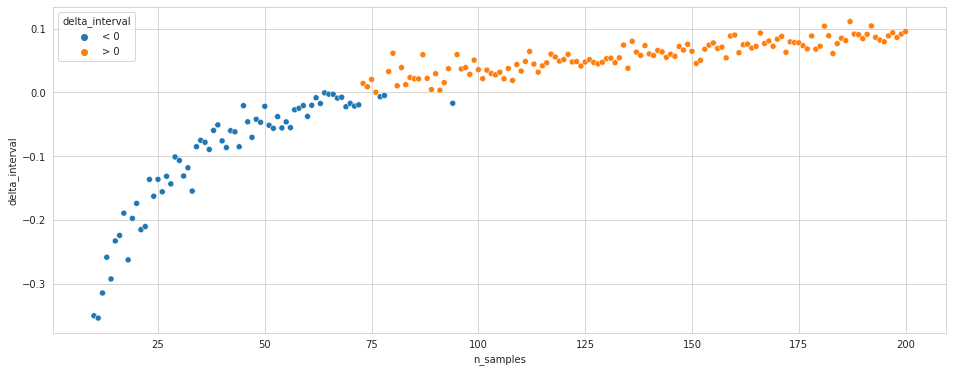

In [ ]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
sns.scatterplot(x=df_d_m_l['n_samples'], 
                y=df_d_m_l['delta_interval'], 
                hue=df_d_m_l['delta_interval'].apply(lambda x: '> 0' if x > 0 else '< 0'))

## Z-критерий для разности долей (независимые выборки)

In [ ]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):  
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)


def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))


def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [ ]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(df_mi, df_lu))

95% confidence interval for a difference between proportions: [-0.460383, 0.025370]


In [ ]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(df_mi, df_lu)))

p-value: 0.090341


In [ ]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(df_mi, df_lu), 'less'))

p-value: 0.045170


## Z-критерий для разности долей (связанные выборки)

Для расчета возьмем только те матчи, которые были и у Луческу и Михайличеснко. Если матчей сыграно было несколько раз, то берем максимальный показатель.

In [ ]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)


def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [ ]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_rel(df_l_m['Михайличенко'], df_l_m['Луческу']))

95% confidence interval for a difference between proportions: [-0.219266, 0.324529]


In [ ]:
print("p-value: %f" \
      % proportions_diff_z_test(proportions_diff_z_stat_rel(df_l_m['Михайличенко'], df_l_m['Луческу'])))

p-value: 0.704396


In [ ]:
print("p-value: %f" \
      % proportions_diff_z_test(proportions_diff_z_stat_rel(df_l_m['Михайличенко'], df_l_m['Луческу']), 'less'))

p-value: 0.647802


Если матчей сыграно было несколько раз, то берем минимальный показатель.

In [ ]:
df_l_min = pd.pivot_table(df, values='Победа', index='Матч', columns='Тренер', aggfunc='min')
df_l_min.dropna(inplace=True)
df_l_min

Тренер,Луческу,Михайличенко
Матч,,
Ворскла Динамо,1.0,1.0
Десна Динамо,0.0,0.0
Динамо Ворскла,1.0,1.0
Динамо Десна,0.0,0.0
Динамо Заря,0.0,0.0
Динамо Колос,0.0,1.0
Динамо Олимпик,1.0,0.0
Динамо СК Днепр-1,1.0,1.0
Динамо ФК Александрия,1.0,1.0


In [ ]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_rel(df_l_min['Михайличенко'], df_l_min['Луческу']))

95% confidence interval for a difference between proportions: [-0.486512, 0.065460]


In [ ]:
print("p-value: %f" \
      % proportions_diff_z_test(proportions_diff_z_stat_rel(df_l_min['Михайличенко'], df_l_min['Луческу'])))

p-value: 0.134891


In [ ]:
print("p-value: %f" \
      % proportions_diff_z_test(proportions_diff_z_stat_rel(df_l_min['Михайличенко'], df_l_min['Луческу']), 'less'))

p-value: 0.067445


## Report

**Количество матчей:**
* Луческу - 26
* Михайличенко - 29

**Точечная оценка доли побед:**
* Луческу - 0.769
* Михайличенко - 0.552

**Интервальные оценки долей по методу Уилсона:**
* Луческу - [0.579484, 0.889662]
* Михайличенко - [0.375480, 0.715868]

**Доверительный интервал для разности долей (по всем матчам):**
* confidence interval: [-0.460383, 0.025370]

**Доверительный интервал для разности долей (по одинаковым матчам):**
* confidence interval (Max): [-0.219266, 0.324529]
* confidence interval (Min): [-0.486512, 0.065460]

**Ширина интервала для разности долей(независимой выборки):**
* 0,48575

**Доверительный интервал на основе Bootstrap(30 samples):**
* Луческу - [0.594842, 0.884770]
* Михайличенко - [0.355186, 0.691686]

**Доверительный интервал на основе Bootstrap(75 samples):**
* Луческу - [0.663303, 0.850874]
* Михайличенко - [0.663303, 0.850874]

**Доверительный интервал на основе Bootstrap(300 samples):**
* Луческу - [0.713586, 0.809207]
* Михайличенко - [0.496296, 0.608114]


**p-value(независимые выборки):**
* alternative = two-sided: 0.090341
* alternative = less: 0.045170

**p-value(одинаковые матчи-Max_result):**
* alternative = two-sided: 0.704396
* alternative = less:  0.647802

**p-value(одинаковые матчи-Min_result):**
* alternative = two-sided: 0.134891
* alternative = less:  0.067445



# Вывод

Доля побед Луческу на 0,21 выше чем у Михайлеченко. Хотя максимальное значение доверительного интервала у Луческу больше чем у Михайличенко, интервальные оценки доли побед по методу Уилсона пересекаются, что не дает права однозначно сделать вывод о том, что Луческу лучше, чем Михайличенко. 

Доверительный интервал для разности долей по всем матчам довольно широкий, значительно смещен влево и едва включает "0" (0.025370).

Доверительный интервал для разности долей по одинаковым лучшим матчам не показывает различий, а по худшим - смещен влево, при этом "0" тоже включает (0.065460).

Ширина интервала для разности долей довольно широкая 0,48575, что говорит о невысокой точности. Чтобы увеличить точность и сузить интервал необходимо больше наблюдений.

Используя Bootstrap сгенерируемая выборка для 30 наблюдений показала практически такие же значения для доверительного интервала как и реальная выборка.

Увеличение Bootstrap-выборки до 75 наблюдений и выше показывает, что доверительные интервалы для средних уже не пересекаются. Гипотеза о равенстве тренеров Луческу и Михайличенко смело отвергается, а значительное смещение доверительного интервала вправо говорит о преимуществе Луческу над Михайличенко.

**Итог:**
На основании результатов доверительного интервала Bootstrap-выборки и достигаемого уровня значимости(alternative = less: 0.045170), можно утверждать с вероятностью 95%, что по количеству побед в УПЛ без учета одинаковых матчей у тренеров, Луческу лучше тренер, чем Михайличенко. С вероятностью 99% - так утверждать нельзя.

**Рекомендации:**
В анализе есть только данные по играм Динамо до 20 мая 2021года. Если добавить данные о матчах в УПЛ за август-сентябрь 2021, то увеличение выборки даст более точный результат анализа.

